<img src="Images/MSA_Logo.jpg" width="500" height="500" align="middle">

# Breast Cancer Detection Using Machine Learning and Wisconsin Dataset

In this notebook we will go through cleaning, understanding the wisconsin dataset then apply multiple machine learning algorithms to determine which works the best on this problem. 

In [1]:
#importing modules

%config IPCompleter.greedy=True

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, cross_validation

C:\Users\mahssalem\Anaconda3\envs\myEnv\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data')

In [3]:
#Cleaning the values don't exist making it huge outlier

df.replace('?', -99999, inplace=True)

In [4]:
#exploring the dataset
df.head()

,id,clump_thickiness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleali,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
print(df.columns.values)

['id' 'clump_thickiness' 'unif_cell_size' 'unif_cell_shape'
 'marg_adhesion' 'single_epith_cell_size' 'bare_nuclei' 'bland_chrom'
 'norm_nucleali' 'mitoses' 'class']


In [6]:
df.tail()

,id,clump_thickiness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleali,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickiness          699 non-null int64
unif_cell_size            699 non-null int64
unif_cell_shape           699 non-null int64
marg_adhesion             699 non-null int64
single_epith_cell_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chrom               699 non-null int64
norm_nucleali             699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
df.describe()

,id,clump_thickiness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleali,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
df.describe(include=['O'])

,bare_nuclei
count,699
unique,11
top,1
freq,402


In [10]:
df[['clump_thickiness', 'class']].groupby(['clump_thickiness'], as_index=False).mean().sort_values(by='class', ascending=False)

,clump_thickiness,class
8,9,4.000000
9,10,4.000000
6,7,3.913043
7,8,3.826087
5,6,3.058824
4,5,2.692308
3,4,2.300000
2,3,2.222222
1,2,2.160000
0,1,2.041379


In [11]:
df[['unif_cell_size', 'class']].groupby(['unif_cell_size'], as_index=False).mean().sort_values(by='class', ascending=False)

,unif_cell_size,class
4,5,4.000000
9,10,4.000000
7,8,3.931034
6,7,3.894737
5,6,3.851852
8,9,3.666667
3,4,3.550000
2,3,2.961538
1,2,2.355556
0,1,2.020833


In [12]:
df[['marg_adhesion', 'class']].groupby(['marg_adhesion'], as_index=False).mean().sort_values(by='class', ascending=False)

,marg_adhesion,class
6,7,4.000000
7,8,4.000000
9,10,3.963636
3,4,3.696970
4,5,3.652174
5,6,3.636364
8,9,3.600000
2,3,2.931034
1,2,2.724138
0,1,2.157248


In [13]:
df[['norm_nucleali', 'class']].groupby(['norm_nucleali'], as_index=False).mean().sort_values(by='class', ascending=False)

,norm_nucleali,class
9,10,4.000000
3,4,3.888889
8,9,3.875000
4,5,3.789474
6,7,3.750000
7,8,3.666667
5,6,3.636364
2,3,3.454545
1,2,2.333333
0,1,2.185102


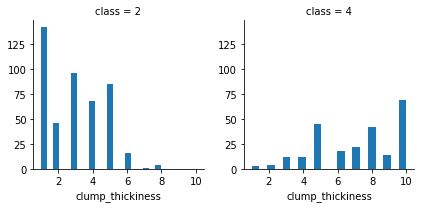

In [14]:
g = sns.FacetGrid(df, col='class')
g.map(plt.hist, 'clump_thickiness', bins=20)

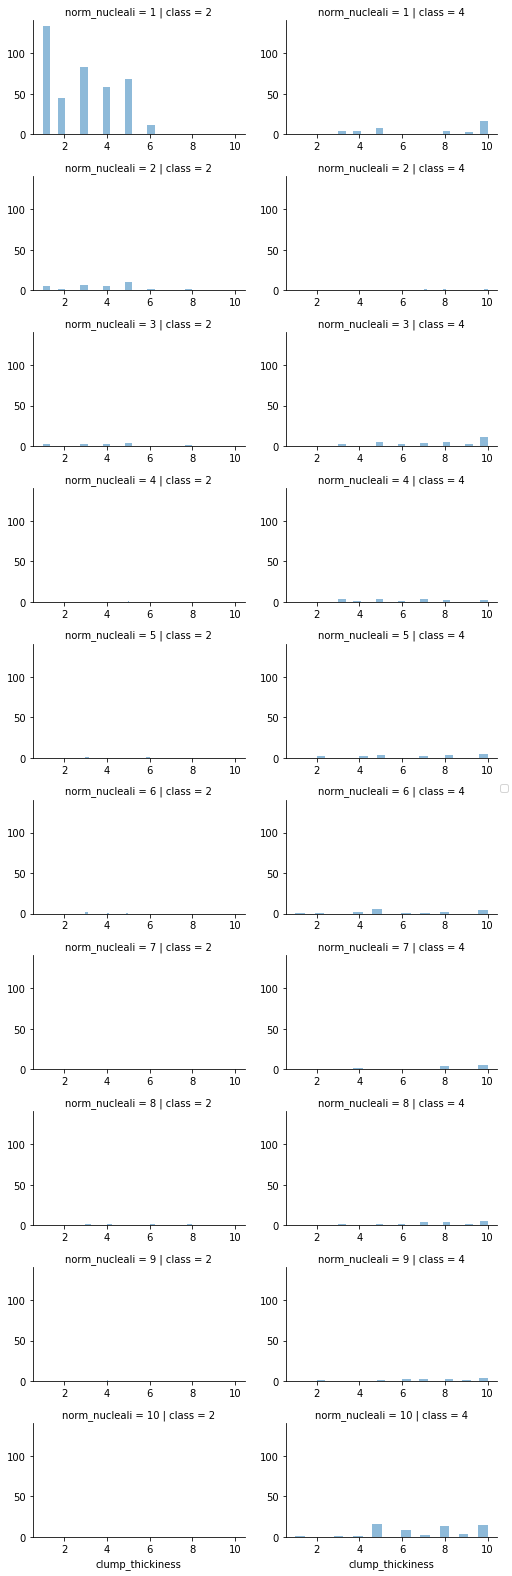

In [15]:

grid = sns.FacetGrid(df, col='class', row='norm_nucleali', size=2.2, aspect=1.6)
grid.map(plt.hist, 'clump_thickiness', alpha=.5, bins=20)
grid.add_legend();

In [16]:
#drop the id

df.drop(['id'], 1, inplace=True)

In [17]:
df.head()

,clump_thickiness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleali,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [18]:
x = df.drop('class', axis=1)
y = df['class']

In [19]:
x.shape, y.shape

((699, 9), (699,))

In [20]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y, test_size=0.2)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((559, 9), (140, 9), (559,), (140,))

# Model, predict and solve

Now we are ready to train a model and predict the required solution. 

There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (benign or malignant) with other variables or features (clump thickness, marginal adhesion, mitosis...). 

We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:


<ul>
    <li><b>Logistic Regression</b></li>
    <li><b>KNN or k-Nearest Neighbors</b></li>
    <li><b>Support Vector Machines</b></li>
    <li><b>Naive Bayes classifier</b></li>
    <li><b>Decision Tree</b></li>
    <li><b>Random Forrest</b></li>
    <li><b>Artificial neural network</b></li>
    <li><b>RVM or Relevance Vector Machine</b></li>
</ul>

In [22]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
acc_log_test = round(logreg.score(x_test, y_test) * 100, 2)
print(acc_log_train)
print(acc_log_test)

96.6
97.14


In [23]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
acc_svc_test = round(svc.score(x_test, y_test) * 100, 2)
print(acc_svc_train)
print(acc_svc_test)

99.82
97.86


In [24]:
#K-Nearest-Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
acc_knn_train = round(knn.score(x_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(x_test, y_test) * 100, 2)
print(acc_knn_train)
print(acc_knn_test)

97.85
95.71


In [25]:
#Guassian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_gaussian_train = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(x_test, y_test) * 100, 2)
print(acc_gaussian_train)
print(acc_gaussian_test)



95.17
97.14


In [26]:
#Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
acc_perceptron_train = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron_test = round(perceptron.score(x_test, y_test) * 100, 2)
print(acc_perceptron_train)
print(acc_perceptron_test)

91.95
90.71


C:\Users\mahssalem\Anaconda3\envs\myEnv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [27]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
#Y_pred = linear_svc.predict(x_test)
acc_linear_svc_train = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc_test = round(linear_svc.score(x_test, y_test) * 100, 2)
print(acc_linear_svc_train)
print(acc_linear_svc_test)

97.14
95.71


In [28]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
acc_sgd_train = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd_test = round(sgd.score(x_test, y_test) * 100, 2)
print(acc_sgd_train)
print(acc_sgd_test)

94.81
93.57


C:\Users\mahssalem\Anaconda3\envs\myEnv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [29]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_decision_tree_train = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(x_test, y_test) * 100, 2)
print(acc_decision_tree_train)
print(acc_decision_tree_test)

100.0
95.0


In [30]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(x_test, y_test) * 100, 2)
print(acc_random_forest_train)
print(acc_random_forest_test)

100.0
97.86


In [31]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score_train': [acc_svc_train, acc_knn_train, acc_log_train, 
              acc_random_forest_train, acc_gaussian_train, acc_perceptron_train, 
              acc_sgd_train, acc_linear_svc_train, acc_decision_tree_train],
    'Score_test': [acc_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, acc_perceptron_test, 
              acc_sgd_test, acc_linear_svc_test, acc_decision_tree_test]})

models.sort_values(by='Score_test', ascending=False)


,Model,Score_test,Score_train
0,Support Vector Machines,97.86,99.82
3,Random Forest,97.86,100.00
2,Logistic Regression,97.14,96.60
4,Naive Bayes,97.14,95.17
1,KNN,95.71,97.85
7,Linear SVC,95.71,97.14
8,Decision Tree,95.00,100.00
6,Stochastic Gradient Decent,93.57,94.81
5,Perceptron,90.71,91.95


# Concolusion

For this simple problem, we get great accuracy using Random Forest and SVM. This is just the start, we will dive into more complicated problems which we will need to use more complex algorithms to obtain acceptable results. 